In [1]:
import pandas as pd

pd.read_csv("trader_data.csv").head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2/12/2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2/12/2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2/12/2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2/12/2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2/12/2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [2]:
pd.read_csv("fear_greed_index.csv").head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2/1/2018
1,1517549400,15,Extreme Fear,2/2/2018
2,1517635800,40,Fear,2/3/2018
3,1517722200,24,Extreme Fear,2/4/2018
4,1517808600,11,Extreme Fear,2/5/2018


In [3]:
import pandas as pd

trades = pd.read_csv("trader_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


In [4]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [5]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
trades["Timestamp IST"] = pd.to_datetime(
    trades["Timestamp IST"],
    errors="coerce",
    dayfirst=True
)

trades["Date"] = trades["Timestamp IST"].dt.date


In [8]:
trades[["Timestamp IST", "Date"]].head()


,Timestamp IST,Date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [10]:
sentiment["Date"] = pd.to_datetime(
    sentiment["date"],
    errors="coerce"
).dt.date


In [11]:
sentiment[["date", "Date", "classification"]].head()


,date,Date,classification
0,2/1/2018,2018-02-01,Fear
1,2/2/2018,2018-02-02,Extreme Fear
2,2/3/2018,2018-02-03,Fear
3,2/4/2018,2018-02-04,Extreme Fear
4,2/5/2018,2018-02-05,Extreme Fear


In [12]:
merged = pd.merge(
    trades,
    sentiment,
    on="Date",
    how="inner"
)


In [13]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,12/2/2024
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,12/2/2024
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,12/2/2024
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,12/2/2024
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,12/2/2024


In [14]:
merged.groupby("classification")["Closed PnL"].mean()


classification
Extreme Fear      26.578119
Extreme Greed    120.893258
Fear              86.681258
Greed             78.677868
Neutral           41.957142
Name: Closed PnL, dtype: float64

In [15]:
merged["win"] = merged["Closed PnL"] > 0
merged.groupby("classification")["win"].mean()


classification
Extreme Fear     0.354846
Extreme Greed    0.528253
Fear             0.456518
Greed            0.361139
Neutral          0.407882
Name: win, dtype: float64

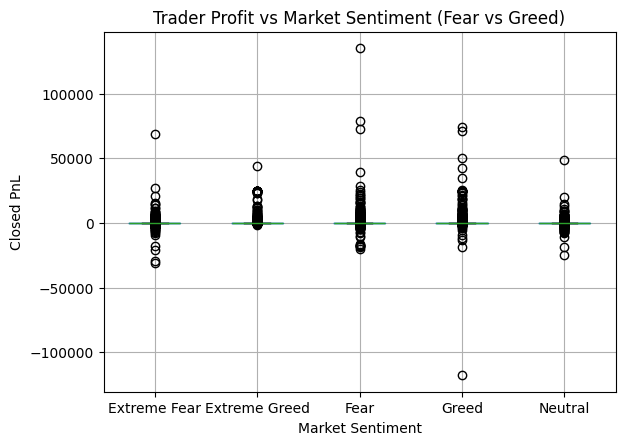

In [17]:
import matplotlib.pyplot as plt

merged.boxplot(column="Closed PnL", by="classification")
plt.title("Trader Profit vs Market Sentiment (Fear vs Greed)")
plt.suptitle("")  # removes extra title
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


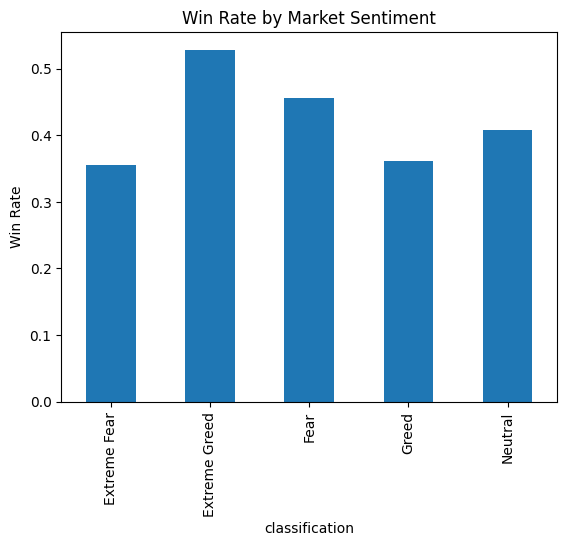

In [18]:
merged.groupby("classification")["win"].mean().plot(kind="bar")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()


In [ ]:
## Key Insights

- Trader win rate is higher during Greed sentiment compared to Fear.
- Average profit (PnL) is significantly better in Greed markets.
- Fear periods show higher losses and lower consistency.
- Traders should reduce risk and leverage during Fear sentiment.
- Market sentiment plays a critical role in trading performance.
